## Assignment 5.1

In [1]:
# load necessary libraries
from keras.datasets import imdb
import numpy as np
 
import matplotlib.pyplot as plt

In [2]:
#Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data[0],'\n\n----------', train_labels[0],'\n\n----------',test_data[0],'\n\n----------', test_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 

---------- 1 

---------- [1, 591, 202, 14, 31, 6, 717, 10

In [4]:
train_labels[0]

1

In [5]:
# Test to see a review
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # Reverse the key (string), value(index)
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
# Encoding the integer sequences into a binary matrix

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# sample train data
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
#Vectorize the label
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
# The model definition
#The Keras implementation
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# Compiling the model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [12]:
# Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [13]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# Training the model
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 4s 87ms/step - loss: 0.5127 - binary_accuracy: 0.7836 - val_loss: 0.3793 - val_binary_accuracy: 0.8728
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3007 - binary_accuracy: 0.9037 - val_loss: 0.3005 - val_binary_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2209 - binary_accuracy: 0.9281 - val_loss: 0.2788 - val_binary_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1722 - binary_accuracy: 0.9443 - val_loss: 0.3223 - val_binary_accuracy: 0.8695
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1395 - binary_accuracy: 0.9565 - val_loss: 0.3105 - val_binary_accuracy: 0.8747
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1164 - binary_accuracy: 0.9647 - val_loss: 0.2927 - val_binary_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - los

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

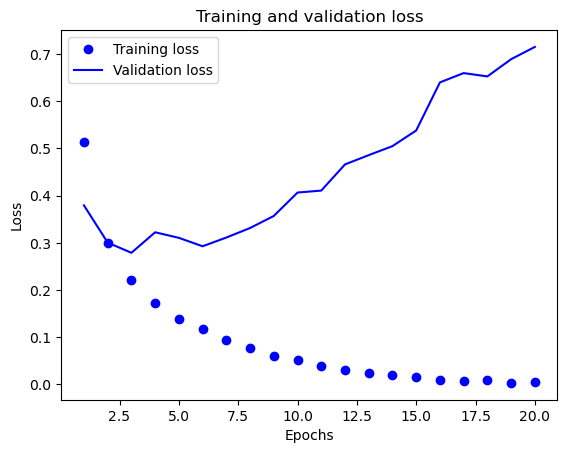

In [16]:
# Plotting training and validation loss
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" for the "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b for the "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

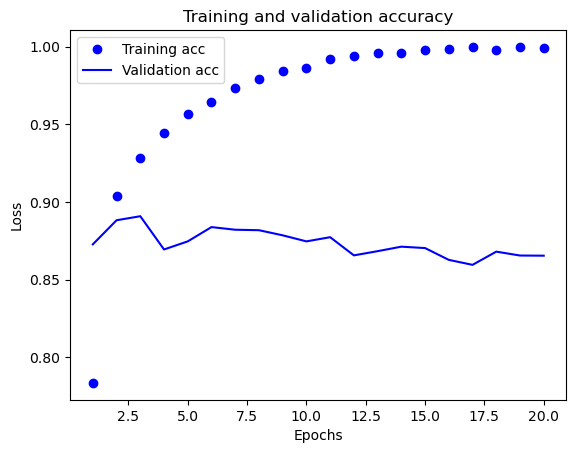

In [17]:
#  Plotting training and validation accuracy
plt.clf() # clear figure
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
#  Retraining a model from scratch
 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

# Fit Model
model.fit(x_train, y_train, epochs=4, batch_size=512)
# Evaluate the model
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 16ms/step - loss: 0.4377 - accuracy: 0.8175
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2590 - accuracy: 0.9067
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2050 - accuracy: 0.9264
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2992 - accuracy: 0.8811


In [19]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.2992 - accuracy: 0.8811


Accuray around 88.6%

In [20]:
#  Using a trained network to generate predictions on new data
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.1567305 ],
       [0.9989557 ],
       [0.5829845 ],
       ...,
       [0.09563804],
       [0.04725974],
       [0.63263386]], dtype=float32)